In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from scipy import stats
import seaborn as sns
import seaborn as sn
%matplotlib inline

In [5]:
df = pd.read_excel('shootings.xlsx')

In [6]:
print(df)

        id                name       date   manner_of_death       armed   age  \
0        3          Tim Elliot 2015-01-02              shot         gun  53.0   
1        4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2        5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4        9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   
...    ...                 ...        ...               ...         ...   ...   
4890  5916     Rayshard Brooks 2020-06-12              shot       Taser  27.0   
4891  5925      Caine Van Pelt 2020-06-12              shot         gun  23.0   
4892  5918        Hannah Fizer 2020-06-13              shot     unarmed  25.0   
4893  5921      William Slyter 2020-06-13              shot         gun  22.0   
4894  5924      Nicholas Hirsh 2020-06-15              shot         gun  31.0   

     gender      race      

In [7]:
df.describe

<bound method NDFrame.describe of         id                name       date   manner_of_death       armed   age  \
0        3          Tim Elliot 2015-01-02              shot         gun  53.0   
1        4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2        5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4        9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   
...    ...                 ...        ...               ...         ...   ...   
4890  5916     Rayshard Brooks 2020-06-12              shot       Taser  27.0   
4891  5925      Caine Van Pelt 2020-06-12              shot         gun  23.0   
4892  5918        Hannah Fizer 2020-06-13              shot     unarmed  25.0   
4893  5921      William Slyter 2020-06-13              shot         gun  22.0   
4894  5924      Nicholas Hirsh 2020-06-15              shot         gun  31

In [8]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [9]:
df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Race'),
 Text(0.5, 1.0, 'Race Histogram')]

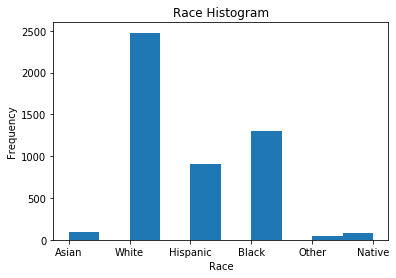

In [12]:
plt.hist(df.race)
plt.gca().set(title='Race Histogram', xlabel='Race', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Age Histogram')]

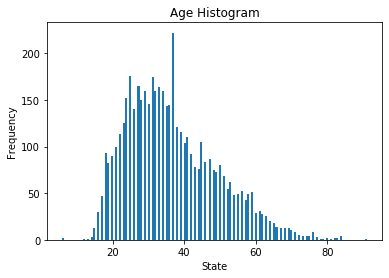

In [19]:
plt.hist(df.age, bins = 150)
plt.gca().set(title='Age Histogram', xlabel='State', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Count of People Shot Year')]

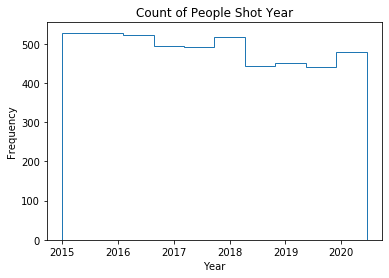

In [24]:
plt.hist(df.date, histtype = 'step')
plt.gca().set(title='Count of People Shot Year', xlabel='Year', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Flee'),
 Text(0.5, 1.0, 'Flee Histogram')]

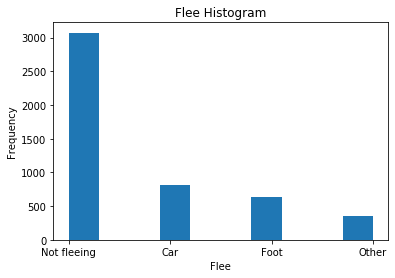

In [32]:
plt.hist(df.flee)
plt.gca().set(title='Flee Histogram', xlabel='Flee', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Threat Level'),
 Text(0.5, 1.0, 'Threat Level Histogram')]

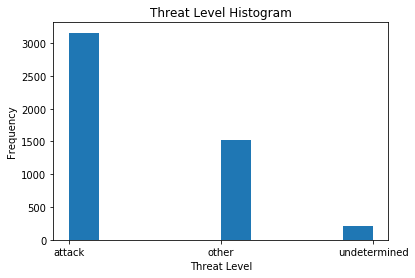

In [31]:
plt.hist(df.threat_level, rwidth = 1)
plt.gca().set(title='Threat Level Histogram', xlabel='Threat Level', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Manner of Death'),
 Text(0.5, 1.0, 'Manner of Death Histogram')]

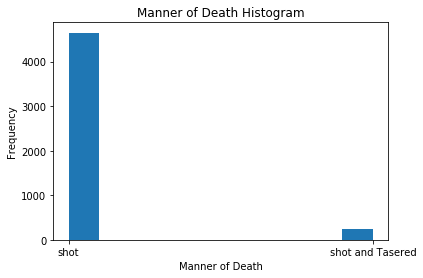

In [33]:
plt.hist(df.manner_of_death)
plt.gca().set(title='Manner of Death Histogram', xlabel='Manner of Death', ylabel='Frequency')

[Text(0, 0.5, 'Number Of Deaths'),
 Text(0.5, 0, 'States'),
 Text(0.5, 1.0, 'Top 15 States with heighest number of deaths')]

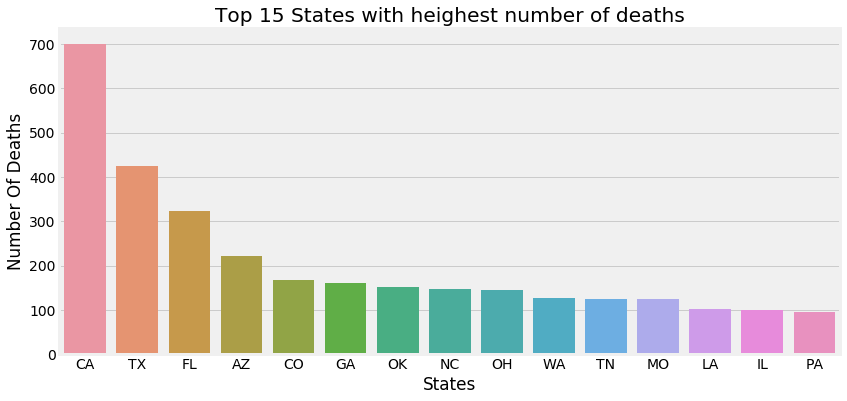

In [34]:
states = df['state'].value_counts().nlargest(15).index
deaths = df['state'].value_counts().nlargest(15).values
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
graph1 = sns.barplot(states, deaths)
graph1.set(xlabel = 'States', ylabel = 'Number Of Deaths', title = 'Top 15 States with heighest number of deaths')

In [40]:
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-04-01 00:00:00,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
first,NaN,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-06-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: args must contain [xmin xmax ymin ymax]

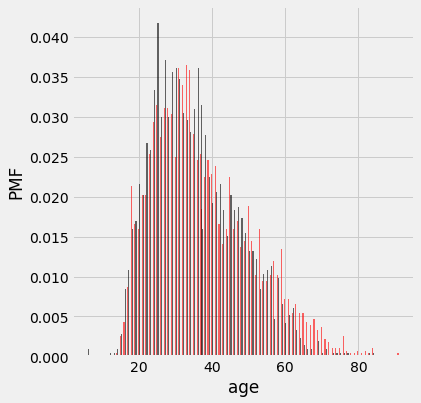

In [50]:
gun_pmf = thinkstats2.Pmf(gun.age, label = 'gun')
other_pmf = thinkstats2.Pmf(other.age, label = 'other')

width = 0.3
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(gun_pmf, align = 'right', width = width, color = 'red')
thinkplot.Hist(other_pmf, align = 'left', width = width, color = 'black')
thinkplot.Config(xlabel = 'age', ylabel = 'PMF', axis = [0, 100, 0.6])

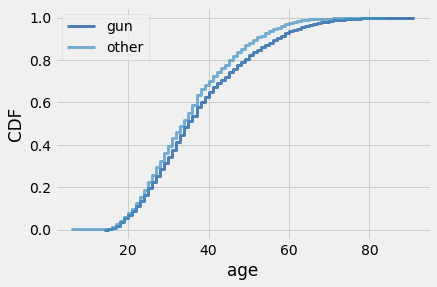

<Figure size 576x432 with 0 Axes>

In [52]:
gun_cdf = thinkstats2.Cdf(gun.age, label = 'gun')
other_cdf = thinkstats2.Cdf(other.age, label = 'other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([gun_cdf, other_cdf])
thinkplot.Show(xlabel = 'age', ylabel = 'CDF')

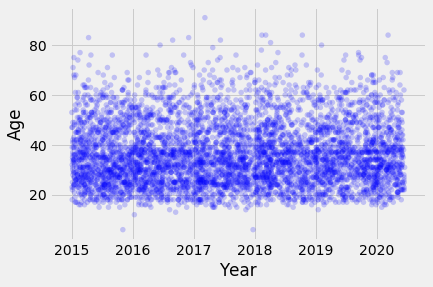

<Figure size 576x432 with 0 Axes>

In [59]:
thinkplot.Scatter(df.date, df.age)
thinkplot.Show(xlabel = 'Year', ylabel = 'Age')

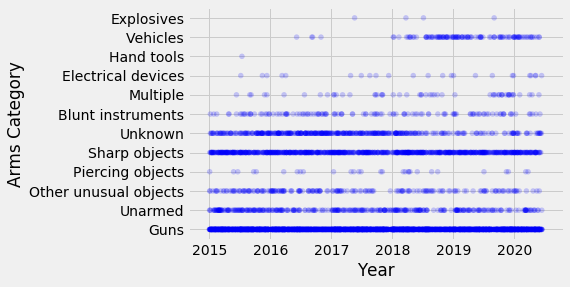

<Figure size 576x432 with 0 Axes>

In [60]:
thinkplot.Scatter(df.date, df.arms_category)
thinkplot.Show(xlabel = 'Year', ylabel = 'Arms Category')

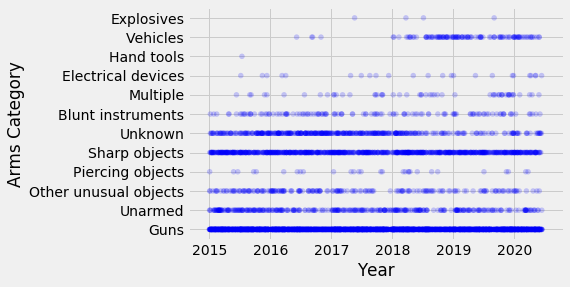

<Figure size 576x432 with 0 Axes>

In [62]:
thinkplot.Scatter(df.date, df.arms_category)
thinkplot.Show(xlabel = 'Year', ylabel = 'Arms Category')

                               id       age  signs_of_mental_illness  \
id                       1.000000  0.022361                -0.086920   
age                      0.022361  1.000000                 0.096865   
signs_of_mental_illness -0.086920  0.096865                 1.000000   
body_camera              0.030910 -0.035463                 0.049636   

                         body_camera  
id                          0.030910  
age                        -0.035463  
signs_of_mental_illness     0.049636  
body_camera                 1.000000  


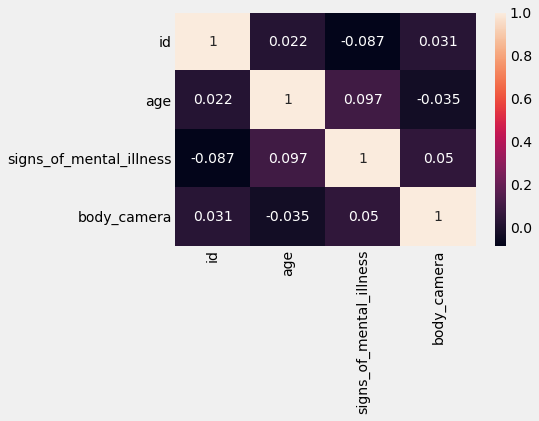

In [64]:
df1 = pd.DataFrame(df)
corrMatrix = df1.corr()
print (corrMatrix)

sn.heatmap(corrMatrix, annot=True)